# Install dependencies

In [1]:
%pip install --pre pycaret[full]

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Remy\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\panel\\dist\\bundled\\datatabulator\\npm\\@holoviz\\panel\\dist\\bundled\\tabulator-tables@4.9.3\\dist\\css\\fast\\tabulator_fast.min.css'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\Remy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



  Using cached fugue-0.6.6-py3-none-any.whl (449 kB)
  Using cached dask-2022.11.1-py3-none-any.whl (1.1 MB)
  Using cached optuna-3.0.3-py3-none-any.whl (348 kB)
  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)
  Using cached moto-4.0.11.dev21-py3-none-any.whl (1.9 MB)
  Using cached fairlearn-0.8.0-py3-none-any.whl (235 kB)
  Using cached pandas_profiling-3.5.0-py2.py3-none-any.whl (325 kB)
  Using cached autoviz-0.1.58-py3-none-any.whl (64 kB)
  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
  Using cached statsforecast-1.3.2-py3-none-any.whl (88 kB)
  Using cached catboost-1.1.1-cp310-none-win_amd64.whl (73.9 MB)
  Using cached interpret-0.3.0-py3-none-any.whl (1.4 kB)
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached holoviews-1.15.2-py2.py3-none-any.whl (4.3 MB)
  Using cached hvplot-0.8.2-py2.py3-none-any.whl (3.2 MB)
  Using cached panel-0.12.7-py2.py3-none-any.whl (12.9 MB)
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
  Using ca

# Initialisation

- Import modules

In [2]:
import pandas as pd
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sb

# from pycaret.classification import *
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

- Load CSV

In [ ]:
df = pd.read_csv('bank-full.csv')

- Remplaçage des chaînes de caractères en valeurs numériques

In [ ]:
df['default'] = df['default'].map({'yes':1 ,'no':0}) 
df['housing'] = df['housing'].map({'yes':1 ,'no':0}) 
df['loan'] = df['loan'].map({'yes':1 ,'no':0}) 

- Réprésentation graphique des data

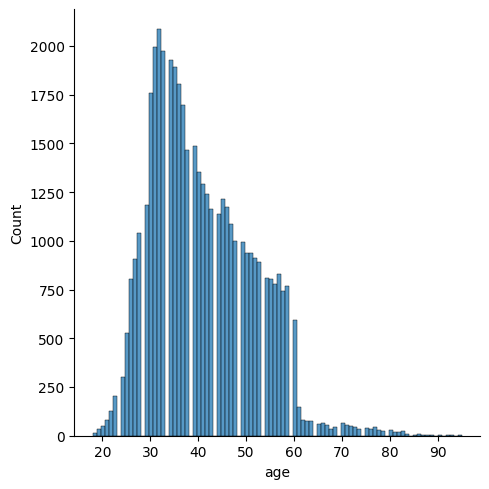

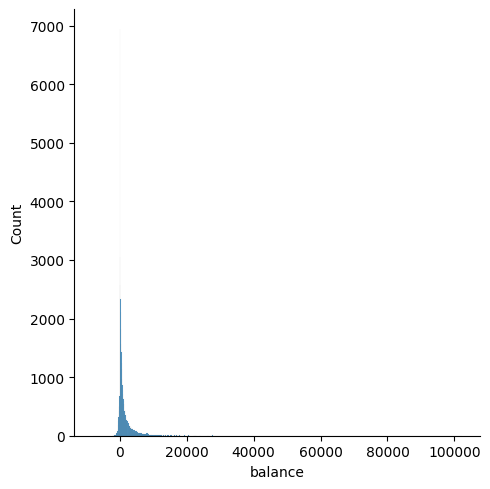

In [ ]:
# Graphe de la quantité de personne en fonction de leur âge
sb.displot(df["age"])
plt.show()

# Graphe de la quantité de personne en fonction de leur balance
sb.displot(df["balance"])
plt.show()

- Setup dataframe using PyCaret

In [ ]:
s = setup(df,
    target = 'Target',
    categorical_features = ['job', 'marital', 'education', 'default', "housing", "loan"],
    numeric_features=['age','balance'],
    ignore_features = ['month', 'day', 'pdays', 'previous', 'contact', 'poutcome', 'campaign', 'pdays', 'duration'],
    normalize = True,
    transformation = True
)

# Correction des datas

In [ ]:
df[["age"]].boxplot()
plt.show()

df[["balance"]].boxplot()
plt.show()

df = df[(df.age >= 17) & (df.age <= 70)]
df = df[(df.balance >= -2000) & (df.balance <= 20000)]


sb.displot(df["age"])
plt.show()

sb.displot(df["balance"])
plt.show()

In [ ]:
plt.figure()
def corrDiagram(widths,height, df, plt=plt):
    for width in widths: 
        diagram = sb.relplot(y=height , x=width, hue="Target", data=df)
        plt.title(width.upper() + ' relationship with '+ height.upper(), fontsize = 20, color = 'black', verticalalignment= 'top')
    return plt


corrDiagram(["education", "job", "balance"], "age", df)

# Predictive Model

- Gradient Boosting Classifier

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8905 entries, 20914 to 40634
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8905 non-null   int64 
 1   balance    8905 non-null   int64 
 2   education  8905 non-null   object
 3   job        8905 non-null   object
 4   Target     8905 non-null   object
dtypes: int64(2), object(3)
memory usage: 417.4+ KB


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

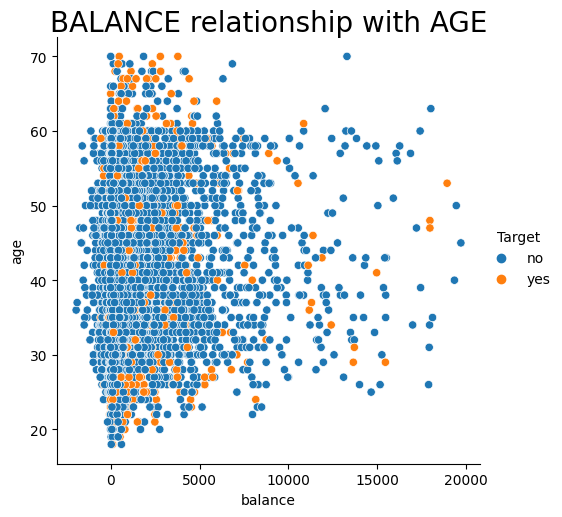

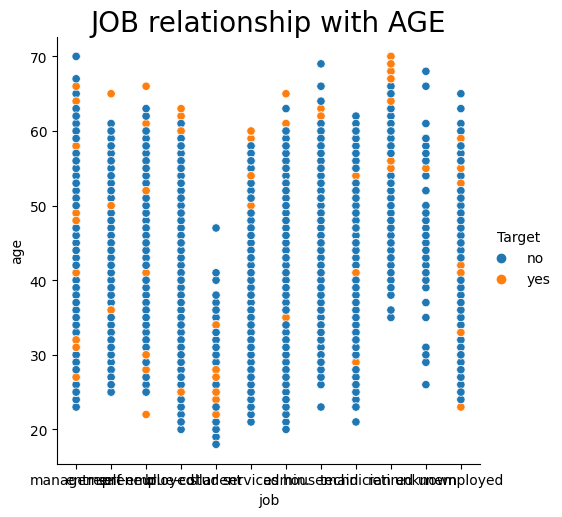

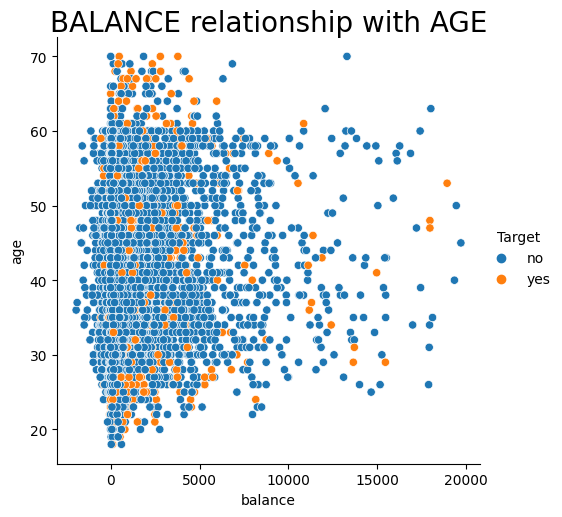

In [14]:
train, test = train_test_split(df, test_size=0.2)

X_train = pd.get_dummies(train.drop(['Target'], axis=1), drop_first=True)
X_test = pd.get_dummies(test.drop(['Target'], axis=1), drop_first=True)

Y_train = train['Target']

model = GradientBoostingClassifier(learning_rate=0.5)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

predictions_df = pd.DataFrame({'age': test["age"],'balance': test["balance"], 'education': test["education"],'job': test["job"],'Target' : predictions})
predictions_df.info()
corrDiagram(["balance", "job", "balance"], "age", predictions_df)

# Comparons les différents modèles

- Compare model afin d'avoir les meilleurs modèles possible

In [32]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8835,0.6032,0.0192,0.5704,0.0370,0.0296,0.0876,1.3710
et,Extra Trees Classifier,0.8835,0.6594,0.0221,0.5508,0.0425,0.0337,0.0920,1.2660
ada,Ada Boost Classifier,0.8831,0.5199,0.0003,0.1000,0.0005,0.0005,0.0049,0.8760
ridge,Ridge Classifier,0.8830,0.0000,0.0000,0.0000,0.0000,-0.0001,-0.0006,0.4250
dummy,Dummy Classifier,0.8830,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4670
svm,SVM - Linear Kernel,0.8829,0.0000,0.0000,0.0000,0.0000,-0.0003,-0.0013,0.4840
lr,Logistic Regression,0.8828,0.6688,0.0003,0.0250,0.0005,0.0000,-0.0007,3.0200
lda,Linear Discriminant Analysis,0.8827,0.6677,0.0005,0.0667,0.0011,0.0002,0.0006,0.5030
gbc,Gradient Boosting Classifier,0.8825,0.5704,0.0000,0.0000,0.0000,-0.0010,-0.0032,1.4470
dt,Decision Tree Classifier,0.8821,0.5006,0.0027,0.3979,0.0053,0.0023,0.0217,0.5030


- Affichage des paramétres du meilleur algorithme

In [33]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=3444, verbose=0, warm_start=False)


- Display graphs

In [34]:
# evaluate_model(best)
plot_model(best, plot = 'feature_all')
plot_model(best, plot = 'parameter')
plot_model(best, plot = 'rfe')
plot_model(best, plot = 'pr')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Save the model

In [37]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\Remy\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['age', 'balance'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=n...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_nodes=None, max_sa

In [ ]:
dashboard(best)
eda(best)

# Create API

In [56]:
loaded_model = load_model('my_best_pipeline')
# create api
create_api(loaded_model, 'model_api')

Transformation Pipeline and Model Successfully Loaded
API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python model_api.py


# Create a Dockerfile

In [54]:
# create docker
create_docker('model_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


# Create front

In [55]:
#create app 
create_app(loaded_model)

ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "C:\Users\Remy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\uvicorn\protocols\http\h11_impl.py", line 407, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "C:\Users\Remy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\uvicorn\middleware\proxy_headers.py", line 78, in __call__
    return await self.app(scope, receive, send)
  File "C:\Users\Remy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastapi\applications.py", line 270, in __call__
    await super().__call__(scope, receive, send)
  File "C:\Users\Remy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\starlette\applicat

ValueError: When localhost is not accessible, a shareable link must be created. Please set share=True.

ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "C:\Users\Remy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\uvicorn\protocols\http\h11_impl.py", line 407, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "C:\Users\Remy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\uvicorn\middleware\proxy_headers.py", line 78, in __call__
    return await self.app(scope, receive, send)
  File "C:\Users\Remy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fastapi\applications.py", line 270, in __call__
    await super().__call__(scope, receive, send)
  File "C:\Users\Remy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\starlette\applicat

In [43]:
!python model_api.py

^C
